In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**TUBES DATA SAINS**

**DATASET: CANCER PREDICTION**

https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset

**Anggota Kelompok:**

**Irawan Mardiansyah (1103210174)**

**Nella Aprilia (1103210185)**

Kumpulan dataset ini berisi informasi medis dan gaya hidup untuk 1500 pasien, yang dirancang untuk memprediksi keberadaan kanker berdasarkan berbagai fitur-fitur seperti:

1. Age : Nilai integer yang mewakili usia pasien, berkisar antara 20 hingga 80.

2. Gender :

 0 menunjukkan Pria

 1 menunjukkan Wanita.

3. BMI : Nilai berkelanjutan yang mewakili Indeks Massa Tubuh, berkisar antara 15 hingga 40.

4. Merokok :

 0:Tidak

 1: Ya

5. GeneticRisk : kategoris yang mewakili tingkat risiko genetik untuk kanker dengan

 0: Rendah

 1: Sedang

 2: Tinggi

6. PhysicalActivity : yang mewakili jumlah jam per minggu yang dihabiskan untuk aktivitas fisik.

7. AlcoholIntake : menunjukkan apakah pasien memiliki riwayat kanker pribadi di mana

 0: Tidak

 1: Ya

8. CancerHistory : Nilai biner yang menunjukkan apakah pasien memiliki riwayat kanker pribadi, di mana

 0: Tidak

 1: Ya

9. Diagnosis : Nilai biner yang menunjukkan status diagnosis kanker, di mana

 0: menunjukkan Tidak Ada Kanker

 1:  menunjukkan Kanker.

Kumpulan data dataset Cancer Prediction ini memprediksikan seseorang kemungkinan terkena cancer berdasarkan sejumlah faktor risiko, baik dari segi perilaku (seperti smoking dan alcoholintake), kondisi fisik (age, BMI), maupun risiko geneticrisk.

**Menghubungkan Google Colab dengan Google Drive**


In [7]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Library**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Data Sains/The_Cancer_data_1500_V2.csv')


In [10]:
print("Preview Data:")
df.head(10)


Preview Data:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


In [11]:
df.sample(10)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1283,57,1,31.560850,0,0,8.616250,2.053502,0,0
107,59,0,38.423946,0,0,0.324708,3.766565,0,1
982,60,1,31.920532,0,0,6.667089,4.547777,0,1
1105,73,0,16.308876,0,0,8.902207,2.919291,0,0
1217,22,1,38.948353,0,1,0.792496,4.020546,0,1
1076,24,1,24.432951,1,0,4.100238,0.102008,0,0
549,63,1,30.864560,0,0,2.519982,0.955259,0,0
929,47,1,34.762745,0,1,8.279250,3.250462,0,0
773,54,1,32.850816,0,0,5.203236,3.481107,0,1
1435,23,1,35.428204,0,0,4.963228,2.767139,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [13]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


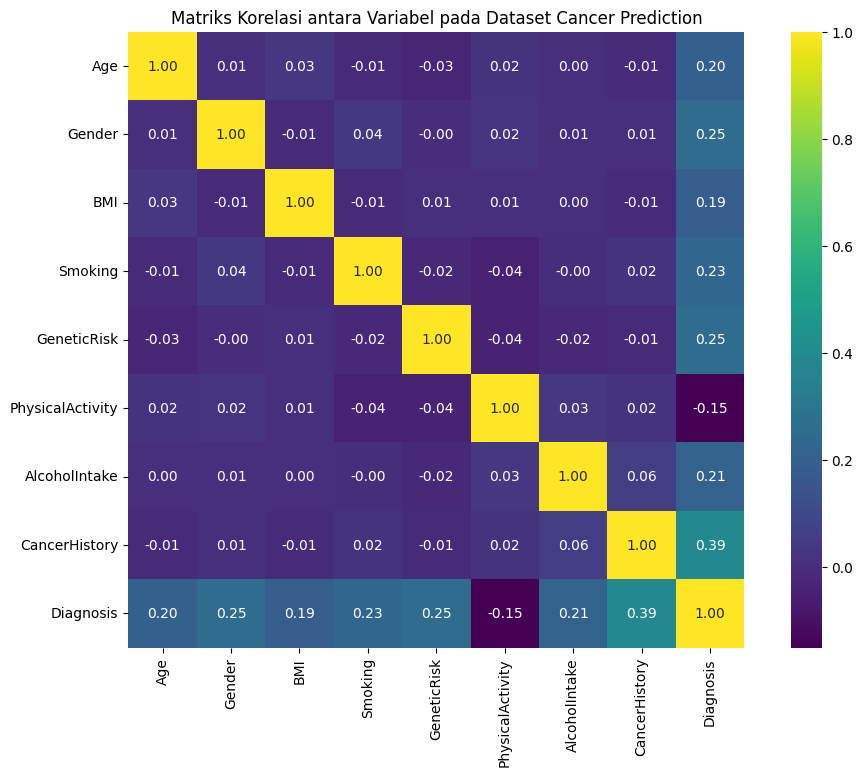

In [14]:
# Menghitung matriks korelasi untuk kolom numerik seperti 'Age', 'BMI', 'PhysicalActivity', dll
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))  # Menentukan ukuran figure
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', square=True)

# Menambahkan judul untuk heatmap
plt.title('Matriks Korelasi antara Variabel pada Dataset Cancer Prediction')

# Menampilkan heatmap
plt.show()


In [15]:
# Menampilkan daftar kolom pada dataset
print("Daftar Kolom pada Dataset Cancer Prediction:", df.columns)

# Memisahkan kolom numerik integer dan float
df_numerik = df.select_dtypes(include=['int64', 'float64'])

# Memisahkan kolom kategorikal object dan integer biner
df_kategorikal = df.select_dtypes(include=['object']).copy()

# Memeriksa fitur biner yang mungkin termasuk kategorikal
for col in df.select_dtypes(include=['int64']):
    if df[col].nunique() <= 3:
        df_kategorikal[col] = df[col]

# Menghapus kolom yang dianggap kategorikal dari data numerik
df_numerik = df_numerik.drop(columns=df_kategorikal.columns, errors='ignore')

# Menampilkan hasil
print("\nData Kategorikal dari Dataset Cancer Prediction:")
print(df_kategorikal.head())

print("\nData Numerik dari Dataset Cancer Prediction:")
print(df_numerik.head())

Daftar Kolom pada Dataset Cancer Prediction: Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

Data Kategorikal dari Dataset Cancer Prediction:
   Gender  Smoking  GeneticRisk  CancerHistory  Diagnosis
0       1        0            1              1          1
1       0        0            1              0          0
2       1        0            2              0          1
3       0        0            0              0          0
4       1        0            0              0          1

Data Numerik dari Dataset Cancer Prediction:
   Age        BMI  PhysicalActivity  AlcoholIntake
0   58  16.085313          8.146251       4.148219
1   71  30.828784          9.361630       3.519683
2   48  38.785084          5.135179       4.728368
3   34  30.040296          9.502792       2.044636
4   62  35.479721          5.356890       3.309849


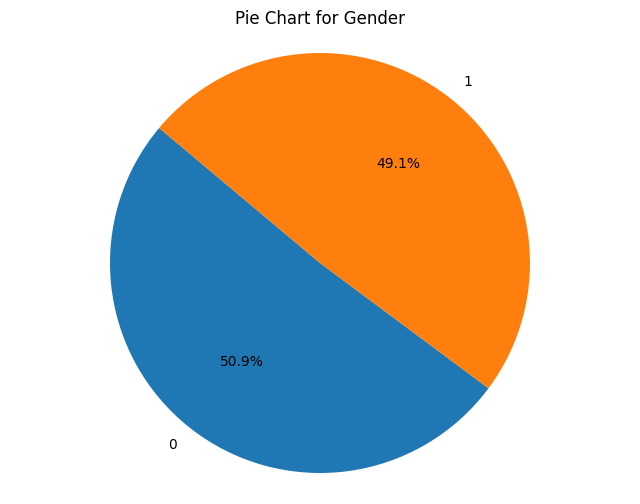

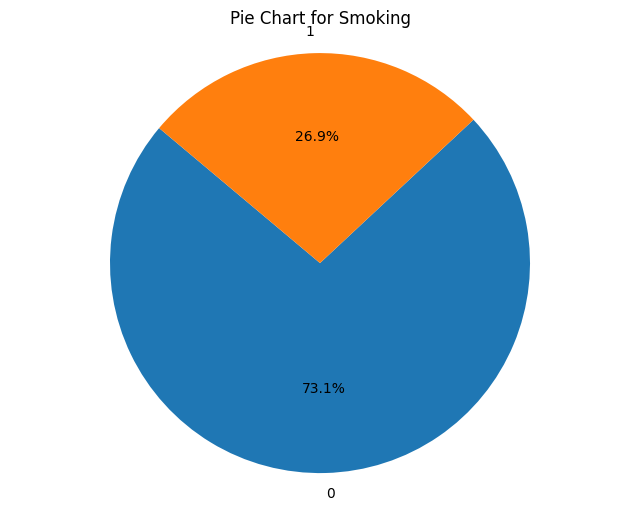

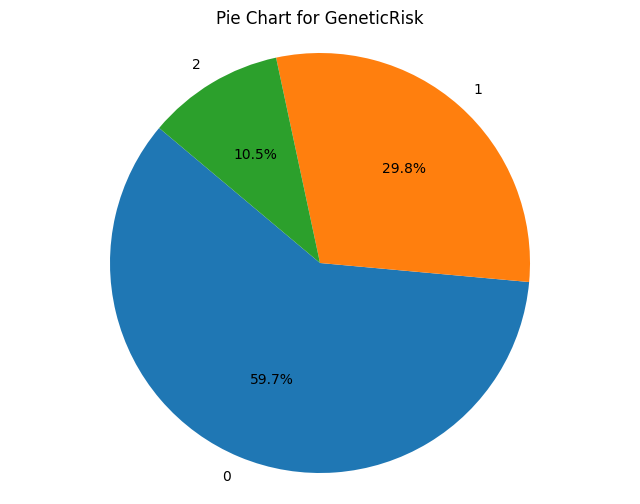

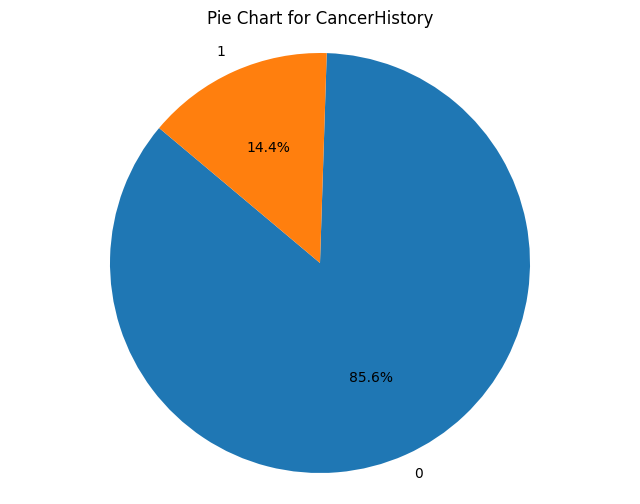

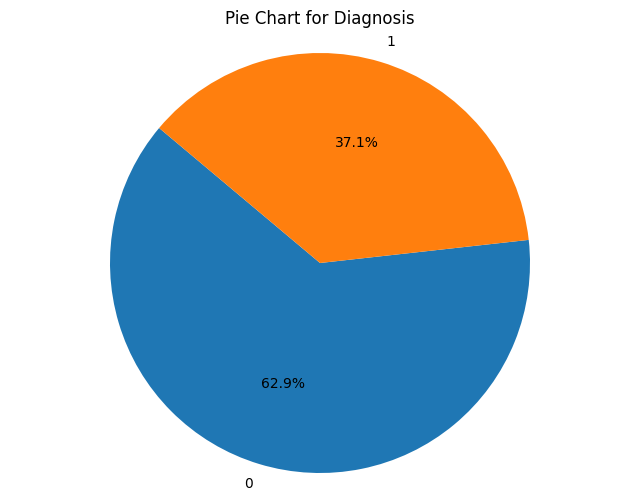

In [16]:
# Kolom-kolom yang akan divisualisasikan menggunakan pie chart
columns_to_visualize = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

# Membuat pie chart untuk setiap kolom yang sudah ditentukan
for column in columns_to_visualize:
    # Mengecek kolom dalam dataset
    if column in df.columns:
        # Dgunakan untuk membedakan kolom numerik dari kolom non-numerik
        if df[column].dtype in ['int64', 'float64']:
            # Pada kolom Age memnbagi menjadi kategori rentang usia
            if column == 'Age':
                bins = [0, 20, 40, 60, 80, 100]  # Rentang usia
                labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
                df[column] = pd.cut(df[column], bins=bins, labels=labels, right=False)

            # Pada kolom BMI, dikategori berdasarkan rentang BMI
            elif column == 'BMI':
                bins = [0, 18.5, 24.9, 29.9, 40]  # Rentang BMI
                labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
                df[column] = pd.cut(df[column], bins=bins, labels=labels, right=False)

        # Menghitung frekuensi setiap nilai pada kolom
        counts = df[column].value_counts()

        # Membuat pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart for {column}')
        plt.axis('equal')  # Agar pie chart berbentuk lingkaran
        plt.show()


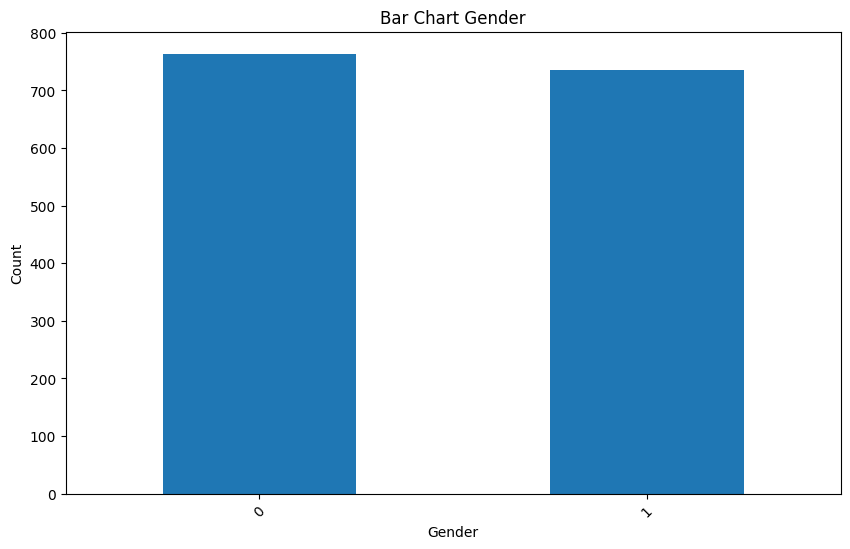

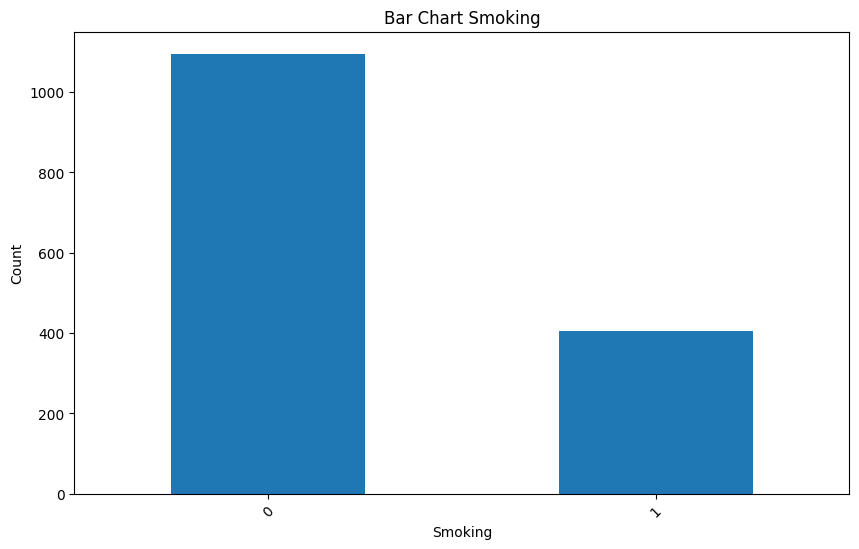

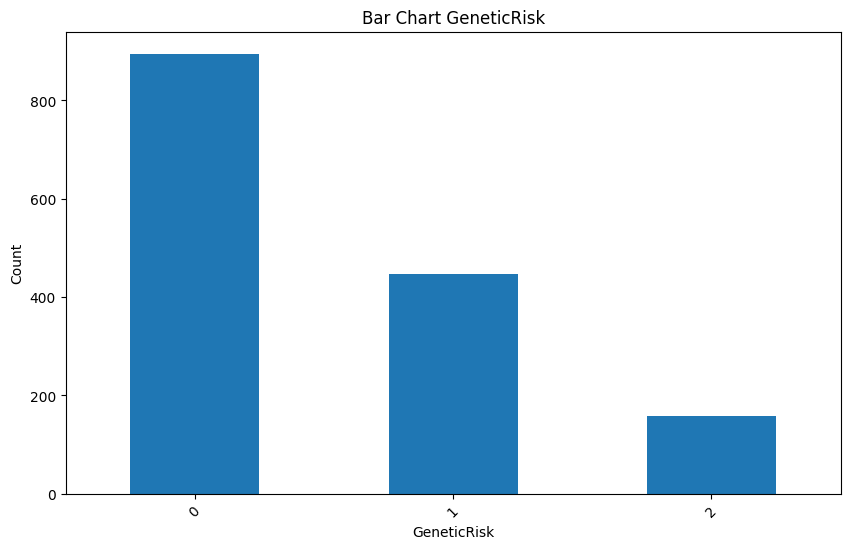

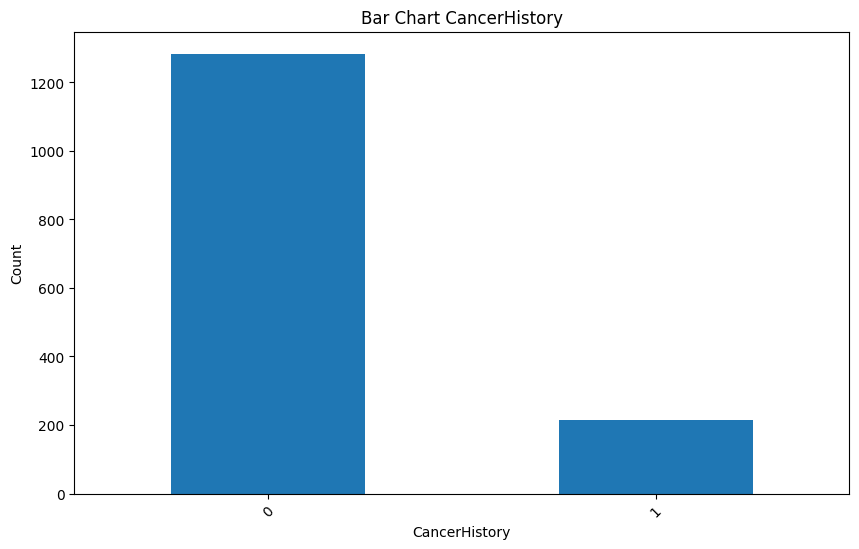

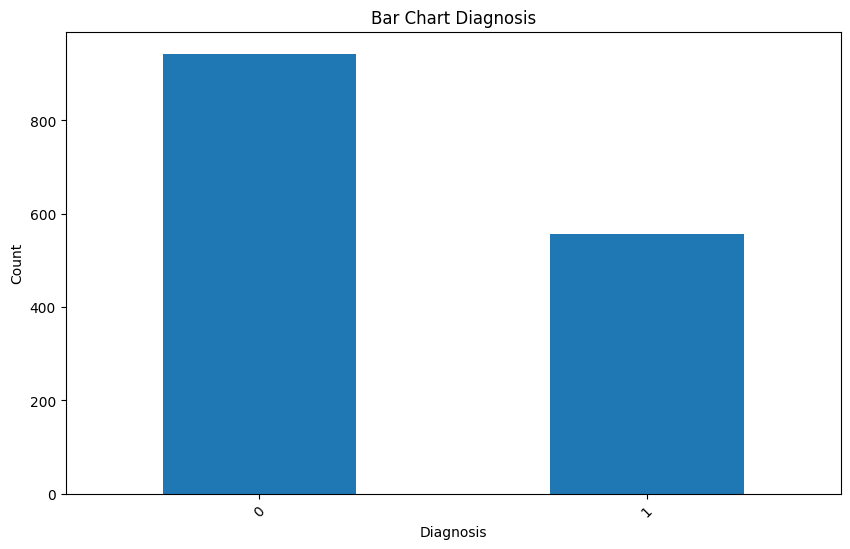

In [17]:
# Menggunakan loop untuk memproses setiap kolom kategorikal dalam dataframe
for column in df_kategorikal.columns:

    # Menghitung frekuensi kemunculan setiap nilai dalam kolom
    counts = df[column].value_counts()

    # Membuat gambar baru untuk setiap kolom
    plt.figure(figsize=(10, 6))

    # Membuat bar chart
    counts.plot(kind='bar')

    # Menambahkan judul pada grafik
    plt.title(f'Bar Chart {column}')  # Judul grafik mencakup nama kolom

    # Menambahkan label sumbu x
    plt.xlabel(column)

    # Menambahkan label sumbu y
    plt.ylabel('Count')

    # Rotasi label pada sumbu X agar mudah dibaca
    plt.xticks(rotation=45)

    # Menampilkan grafik yang sudah dibuat
    plt.show()  # Menampilkan bar chart di layar


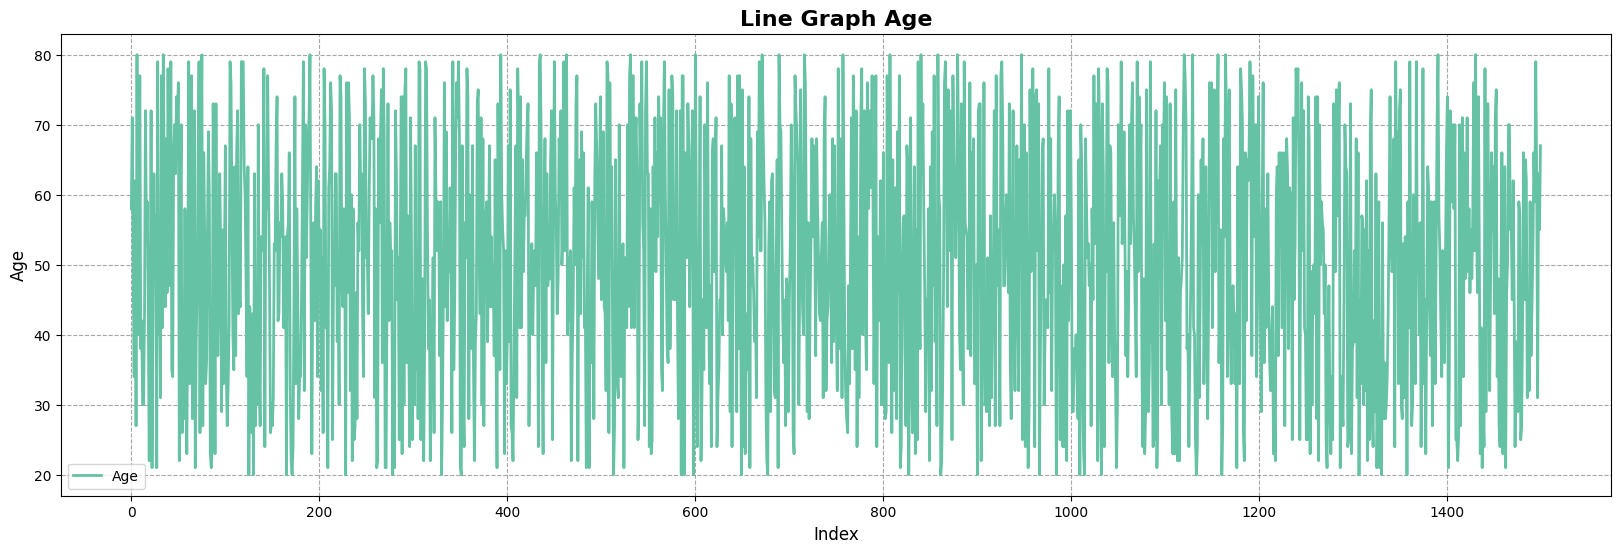

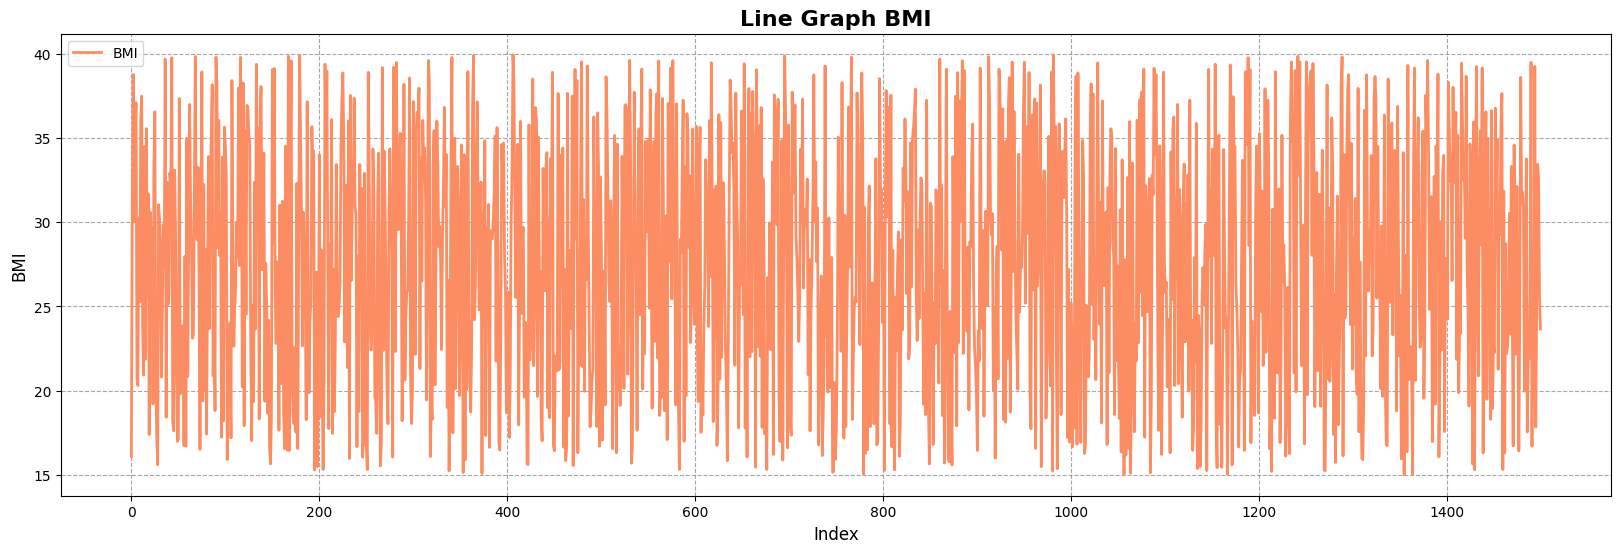

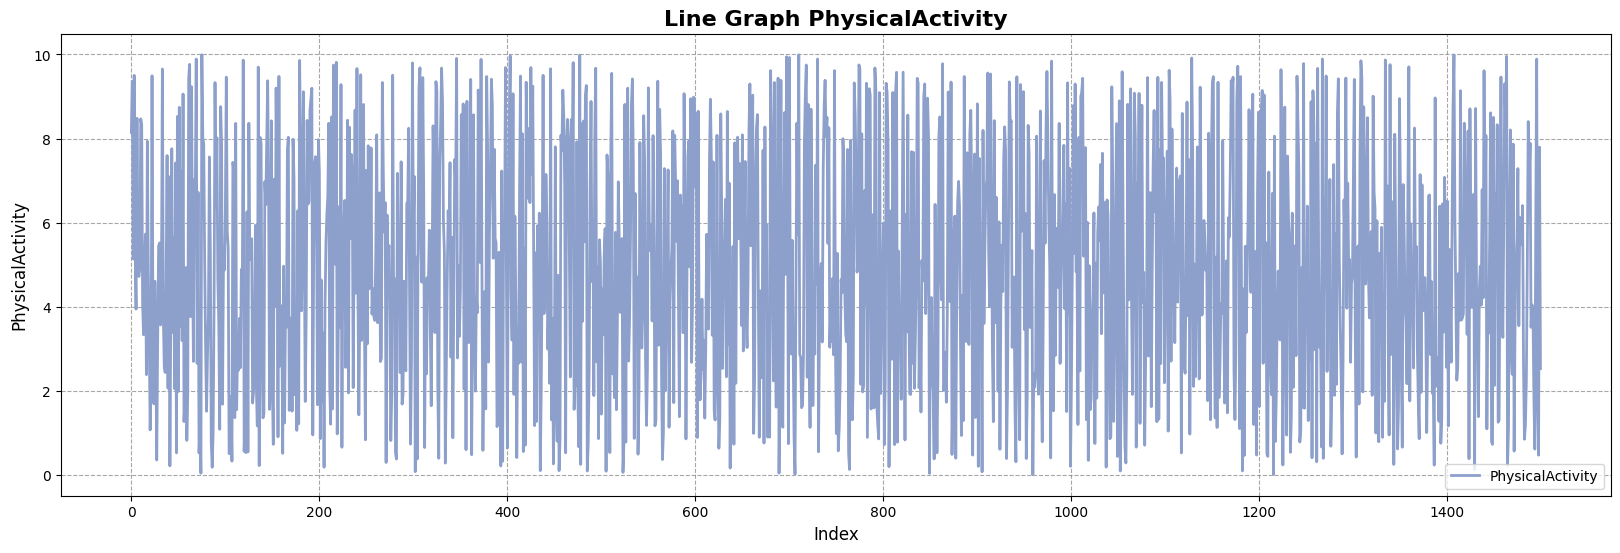

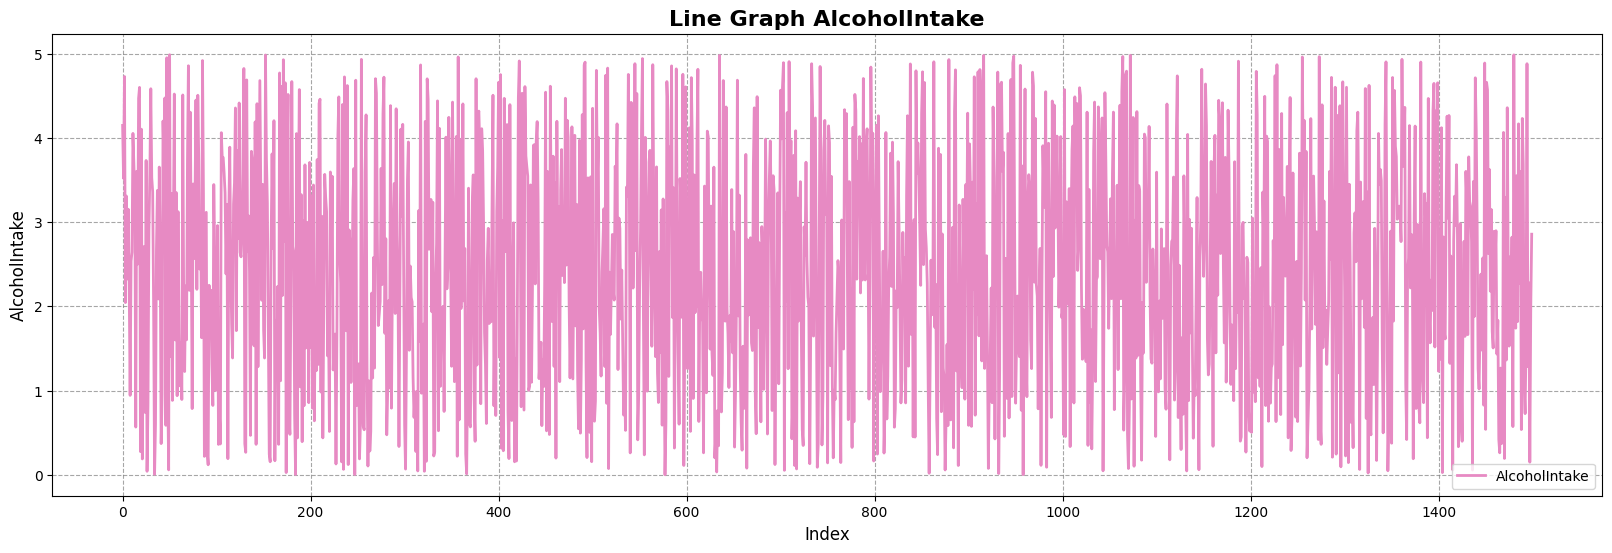

In [18]:
# Menentukan palet warna dari seaborn
colors = sns.color_palette("Set2", len(df_numerik.columns))

# Loop untuk setiap kolom numerik dalam dataframe
for i, column in enumerate(df_numerik.columns):
    plt.figure(figsize=(20, 6))  # Menentukan ukuran gambar

    # Membuat plot dengan warna
    plt.plot(df[column], label=column, color=colors[i], linewidth=2)

    # Menambahkan judul, label sumbu, dan grid
    plt.title(f'Line Graph {column}', fontsize=16, fontweight='bold')
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column, fontsize=12)

    # Menampilkan grid
    plt.grid(True, linestyle='--', color='grey', alpha=0.7)  # Grid dengan garis putus-putus dan transparansi

    # Menambahkan legenda
    plt.legend()

    # Menampilkan plot
    plt.show()



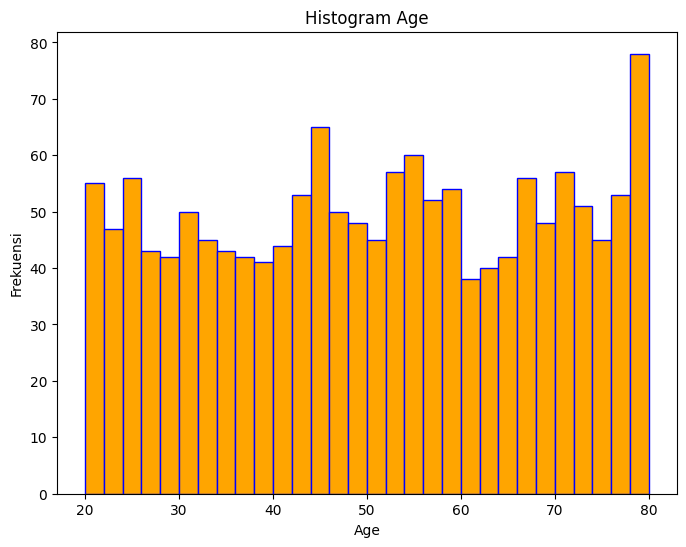

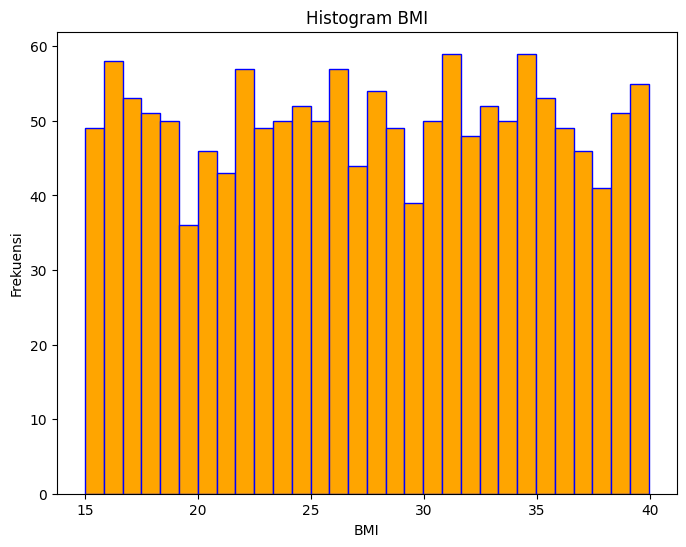

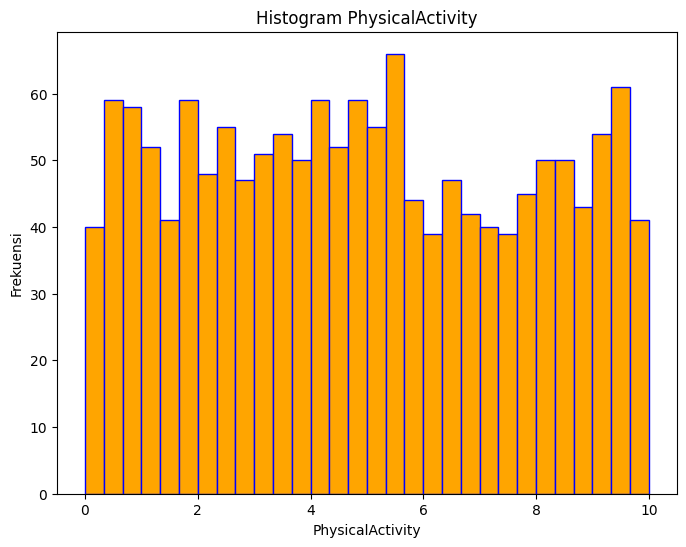

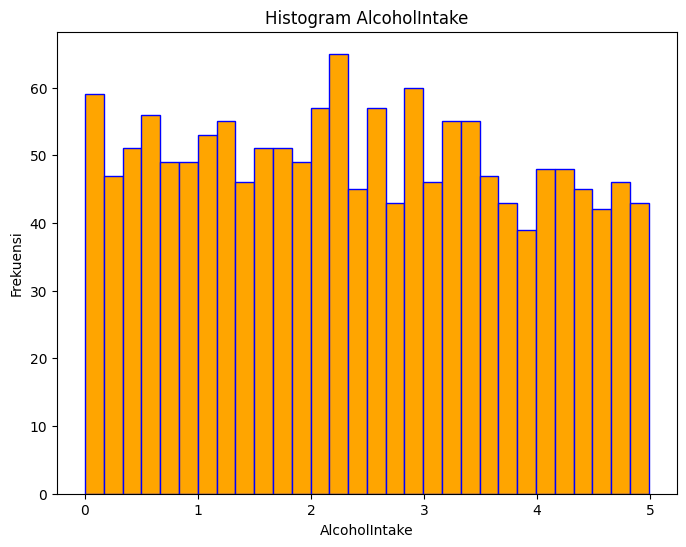

In [19]:
 # Loop untuk setiap kolom numerik dalam dataframe
for column in df_numerik.columns:
    # Membuat figure baru dengan ukuran 8x6
    plt.figure(figsize=(8, 6))

    # Membuat histogram untuk setiap kolom
    plt.hist(df[column], bins=30, color='orange', edgecolor='blue')

    # Menambahkan judul histogram
    plt.title(f'Histogram {column}')

    # Menambahkan label pada sumbu x
    plt.xlabel(f'{column}')

    # Menambahkan label pada sumbu y dengan 'Frekuensi'
    plt.ylabel('Frekuensi')

    # Menampilkan plot (histogram)
    plt.show()


<ipython-input-20-d2625412e065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=column, data=df, palette='Set2')


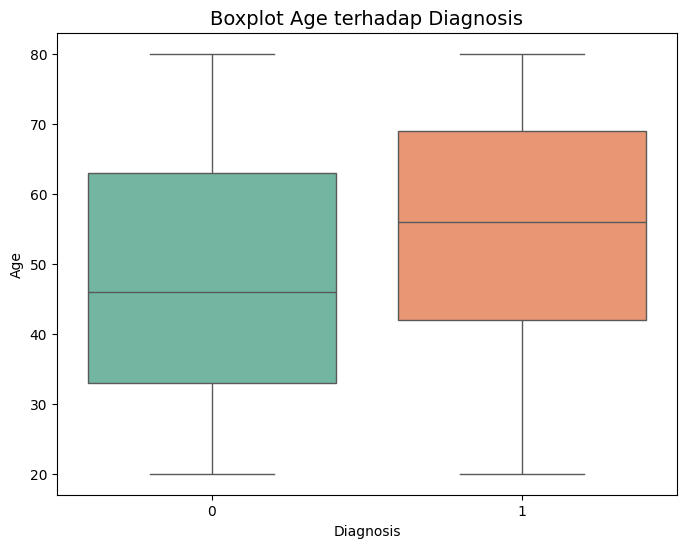

<ipython-input-20-d2625412e065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=column, data=df, palette='Set2')


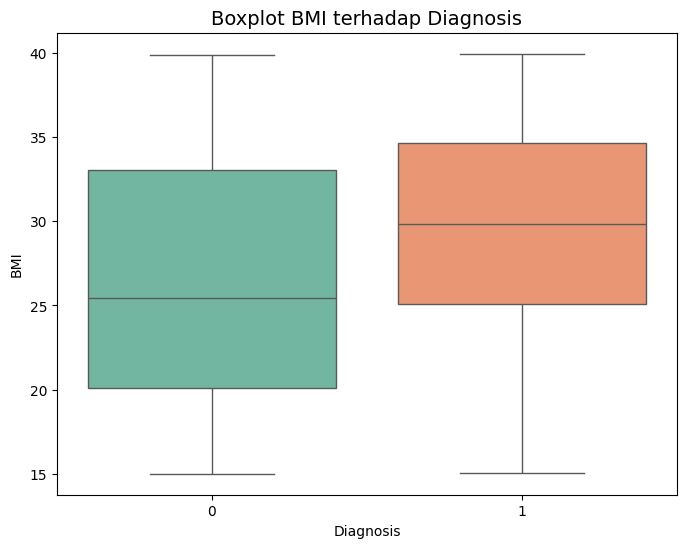

<ipython-input-20-d2625412e065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=column, data=df, palette='Set2')


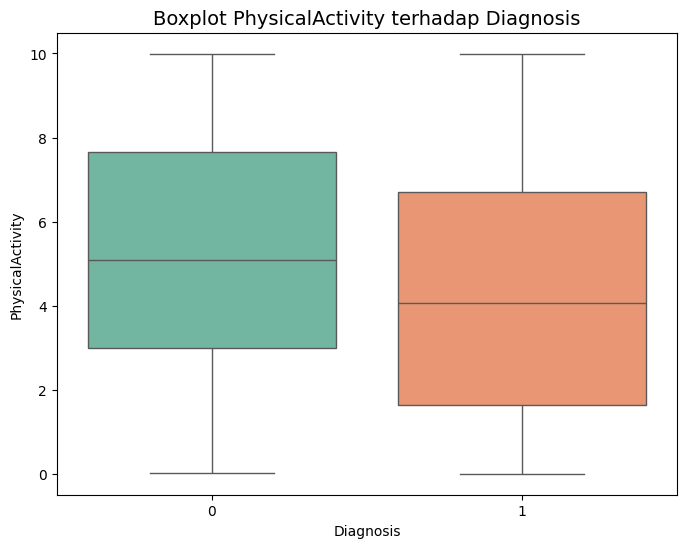

<ipython-input-20-d2625412e065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=column, data=df, palette='Set2')


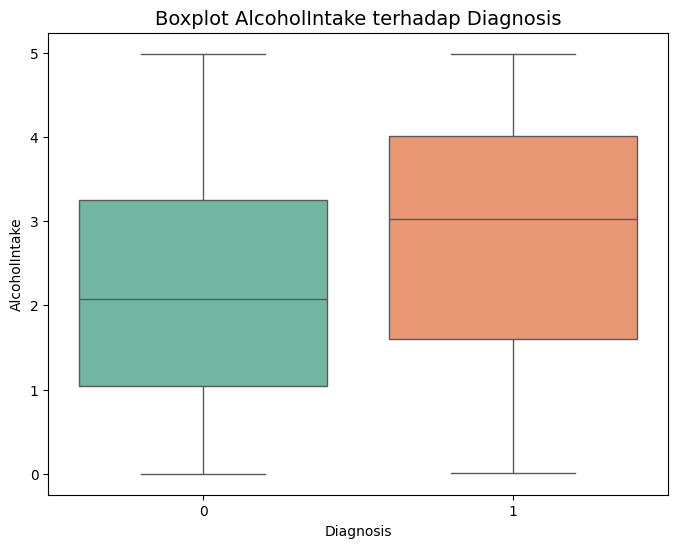

In [20]:
# Loop untuk setiap kolom numerik dalam dataframe
for column in df_numerik.columns:
    plt.figure(figsize=(8,6))

    # Membuat boxplot untuk kolom numerik terhadap Diagnosis dengan palet warna 'Set2'
    sns.boxplot(x='Diagnosis', y=column, data=df, palette='Set2')

    # Menambahkan judul
    plt.title(f'Boxplot {column} terhadap Diagnosis', fontsize=14)

    # Menampilkan plot
    plt.show()

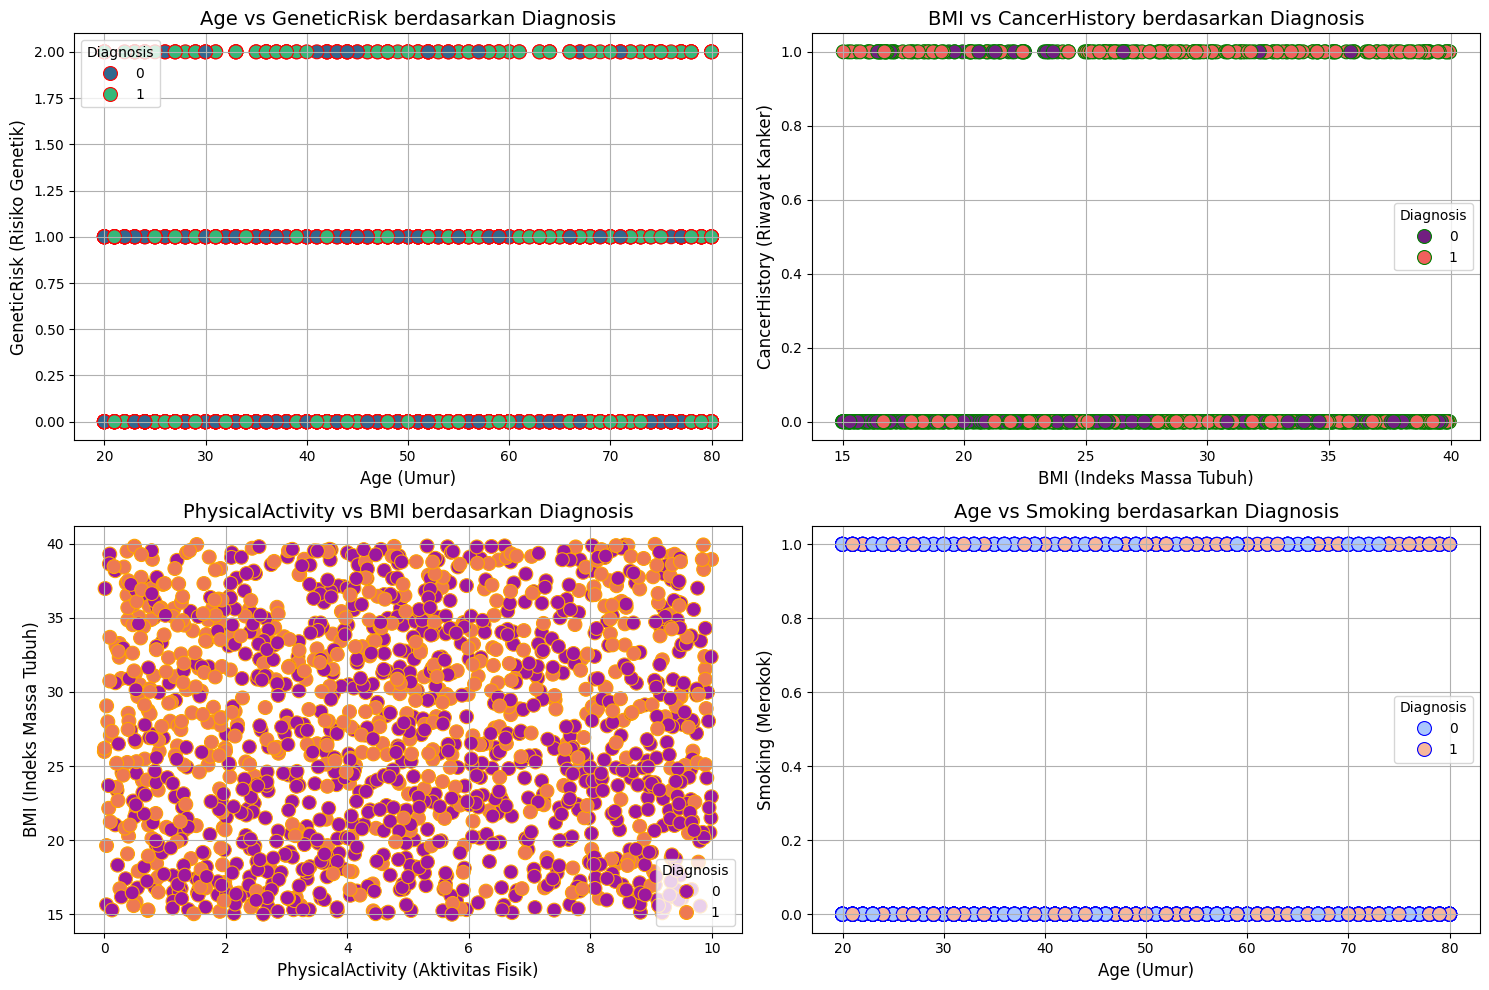

In [21]:
# Mengatur ukuran figure untuk plot yang lebih besar
plt.figure(figsize=(15, 10))

# Scatter Plot 1: Age vs GeneticRisk
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='GeneticRisk', hue='Diagnosis', data=df, palette='viridis', s=100, edgecolor='red')
plt.title('Age vs GeneticRisk berdasarkan Diagnosis', fontsize=14)
plt.xlabel('Age (Umur)', fontsize=12)
plt.ylabel('GeneticRisk (Risiko Genetik)', fontsize=12)
plt.grid(True)

# Scatter Plot 2: BMI vs CancerHistory
plt.subplot(2, 2, 2)
sns.scatterplot(x='BMI', y='CancerHistory', hue='Diagnosis', data=df, palette='magma', s=100, edgecolor='green')
plt.title('BMI vs CancerHistory berdasarkan Diagnosis', fontsize=14)
plt.xlabel('BMI (Indeks Massa Tubuh)', fontsize=12)
plt.ylabel('CancerHistory (Riwayat Kanker)', fontsize=12)
plt.grid(True)

# Scatter Plot 3: PhysicalActivity vs BMI
plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalActivity', y='BMI', hue='Diagnosis', data=df, palette='plasma', s=100, edgecolor='orange')
plt.title('PhysicalActivity vs BMI berdasarkan Diagnosis', fontsize=14)
plt.xlabel('PhysicalActivity (Aktivitas Fisik)', fontsize=12)
plt.ylabel('BMI (Indeks Massa Tubuh)', fontsize=12)
plt.grid(True)

# Scatter Plot 4: Age vs Smoking
plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='Smoking', hue='Diagnosis', data=df, palette='coolwarm', s=100, edgecolor='blue')
plt.title('Age vs Smoking berdasarkan Diagnosis', fontsize=14)
plt.xlabel('Age (Umur)', fontsize=12)
plt.ylabel('Smoking (Merokok)', fontsize=12)
plt.grid(True)

# Menyesuaikan tampilan layout
plt.tight_layout()

# Menampilkan plot
plt.show()


In [22]:


# Daftar kolom kategorikal yang akan diencode
categorical_columns = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding untuk setiap kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Menampilkan informasi dataset setelah encoding
print("\nInformasi dataset setelah encoding:")
print(df.info())

# Menampilkan jumlah kategori pada kolom 'Gender' setelah encoding
print("\nJumlah kategori pada kolom 'Gender':")
print(df['Gender'].value_counts())




Informasi dataset setelah encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None

Jumlah kategori pada kolom 'Gender':
Gender
0    764
1    736
Name: count, dtype: int64


In [23]:
# Menghapus baris yang memiliki nilai '2' pada kolom 'Gender'
df = df[df['Gender'] != 2]

# Menampilkan jumlah kategori pada kolom 'Gender'
print(df['Gender'].value_counts())


Gender
0    764
1    736
Name: count, dtype: int64


In [24]:
# Mengecek missing values untuk mengetahui kolom mana yang memiliki nilai yang hilang
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Mengisi missing values pada kolom numerik dengan rata-rata
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Mengambil kolom numerik

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())  # Mengisi missing values dengan rata-rata

# Cek missing values setelah diselesaikan
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

# Menyimpan dataset yang sudah diisi missing values
df.to_csv('/content/drive/MyDrive/Data Sains/The_Cancer_data_1500_V2.csv', index=False)

# Menampilkan informasi dataframe setelah missing values diselesaikan
df.describe()


Missing values before handling:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

Missing values after handling:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [25]:
X = df.drop(columns=['Diagnosis'])  # Diagnosis kolom target
y = df['Diagnosis']  # Kolom target Diagnosis

# Fitur terbaik menggunakan SelectKBest dengan skor Chi-Squared
select_feature = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest pada data
fit = select_feature.fit(X, y)

# Membuat DataFrame untuk skor fitur
dfscore = pd.DataFrame(fit.scores_)

# Membuat DataFrame untuk kolom fitur
dfcolumns = pd.DataFrame(X.columns)

# Menggabungkan skor dan kolom fitur
featureScore = pd.concat([dfcolumns, dfscore], axis=1)

# Memberi nama kolom pada DataFrame featureScore
featureScore.columns = ['Columns', 'Score']

# Menampilkan fitur yang dipilih berdasarkan skor tertinggi
print(featureScore.sort_values(by='Score', ascending=False))


            Columns       Score
0               Age  358.332136
7     CancerHistory  197.493739
2               BMI  100.188297
4       GeneticRisk   87.263693
5  PhysicalActivity   56.635196
6     AlcoholIntake   56.537404
3           Smoking   56.475210
1            Gender   47.878399


[0.14719706 0.07205808 0.14620496 0.05772038 0.13326439 0.13682426
 0.14984688 0.15688399]


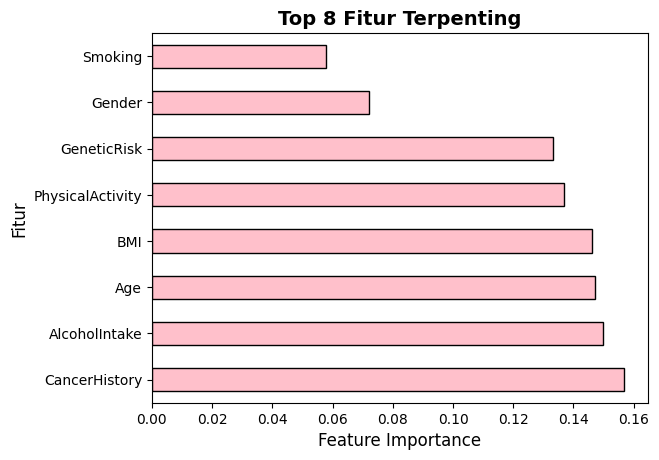

In [26]:
# Membuat model ExtraTreesClassifier
model = ExtraTreesClassifier()

# Melatih model dengan data (X sebagai fitur, y sebagai target)
model.fit(X, y)

# Menampilkan nilai feature importances
print(model.feature_importances_)

# Membuat Series dari feature importances dengan nama fitur sebagai index
feat_importance = pd.Series(model.feature_importances_, index=X.columns)

# Menampilkan 8 fitur terpenting dengan menggunakan plot horizontal
feat_importance.nlargest(8).plot(kind='barh', color='pink', edgecolor='black')

# 6. Menampilkan grafik
plt.title('Top 8 Fitur Terpenting', fontsize=14, fontweight='bold')  # Menambahkan judul
plt.xlabel('Feature Importance', fontsize=12)  # Menambahkan label pada sumbu X
plt.ylabel('Fitur', fontsize=12)  # Menambahkan label pada sumbu Y
plt.show()  # Menampilkan grafik


In [27]:
print("Hasil Akhir:")
df.head(20)

Hasil Akhir:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


In [28]:
print("Hasil Akhir:")
df.tail(20)

Hasil Akhir:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1480,42,1,31.786979,0,1,6.404833,4.984953,1,1
1481,66,0,30.807054,0,0,2.594492,2.127779,0,0
1482,45,0,19.974803,0,1,0.846488,1.741153,0,0
1483,65,0,25.458347,0,0,1.192717,3.551049,0,0
1484,62,0,33.773495,0,1,2.245824,1.819497,1,1
1485,31,0,17.534322,0,0,5.001979,4.166372,0,0
1486,45,1,21.946319,0,1,8.404428,2.271354,0,0
1487,32,0,21.907978,0,0,7.012933,3.597792,0,1
1488,59,1,25.800473,0,1,7.890406,0.537266,0,0
1489,37,0,39.509219,0,1,3.509756,4.230596,0,0


In [29]:
print("Hasil Akhir:")
df.sample(20)

Hasil Akhir:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
797,62,0,31.714316,0,0,1.936238,3.764931,0,1
1058,37,0,16.171298,1,1,0.281913,3.437324,0,0
1409,25,0,36.542273,0,0,4.047059,4.257422,0,1
1364,60,0,33.233620,0,1,2.541473,4.362314,0,0
865,76,1,15.688418,1,0,2.153593,2.260915,0,0
1286,21,0,24.945916,0,1,3.523089,4.717826,0,0
1207,41,1,22.262613,0,0,5.523380,4.273087,0,0
1354,31,1,15.000291,0,0,5.724077,3.902609,0,0
931,60,0,34.855267,0,0,0.388129,4.781106,0,1
305,28,0,36.162858,0,0,5.692302,1.478764,0,0


# **UAS**

In [44]:
!pip install streamlit
!pip install pyngrok

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import streamlit as st

In [46]:
# Load dataset
st.write("### Load Dataset")
@st.cache
def load_data():
    data = pd.read_csv('/content/drive/MyDrive/Data Sains/The_Cancer_data_1500_V2.csv')  # Dataset cancer prediction
    return data

data = load_data()
st.write(data.head())

2024-12-24 01:47:16.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:16.742 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/ar

In [47]:
# Preprocessing data
st.write("### Data Preprocessing")

2024-12-24 01:47:20.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:20.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:20.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:20.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [48]:
# Feature and target selection
st.write("#### Selecting Features and Target")
features = data.drop(columns=['Diagnosis'])  # Assuming 'diagnosis' is the target column
target = data['Diagnosis']
st.write("Features:", features.columns.tolist())
st.write("Target:", 'Diagnosis')

2024-12-24 01:47:23.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:23.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
# Train-test split
st.write("#### Splitting Data")
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
st.write(f"Training data size: {X_train.shape[0]} rows")
st.write(f"Test data size: {X_test.shape[0]} rows")

2024-12-24 01:47:25.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:25.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [50]:
# Model training
st.write("### Train Model")
clf = RandomForestClassifier(random_state=42)
st.write("Training the model...")
clf.fit(X_train, y_train)
st.write("Model training complete!")

2024-12-24 01:47:27.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:27.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [51]:
# Model evaluation
st.write("### Model Evaluation")
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
st.write(f"Accuracy: {accuracy:.2f}")
st.write("Classification Report:")
st.text(classification_report(y_test, y_pred))

2024-12-24 01:47:30.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:30.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [52]:
# Interactive prediction
st.write("### Make Predictions")
def user_input_features():
    input_data = {}
    for feature in features.columns:
        input_data[feature] = st.number_input(f"{feature}", value=0.0)
    return pd.DataFrame([input_data])

input_df = user_input_features()
st.write("Input Data:", input_df)

if st.button('Predict Diagnosis'):
    prediction = clf.predict(input_df)[0]
    st.write(f"Predicted Diagnosis: {prediction}")

2024-12-24 01:47:32.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 01:47:32.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [53]:
%%writefile app.py
import streamlit as st

st.title('Cancer Prediction')
st.write('This is a simple app to predict cancer diagnosis.')

Writing app.py
